# Essential Questions to Answer
1. What rental features (amenities, house rules) lead to higher customer ratings and fetch higher rental income?
2. What are the features of high-demand properties? (75th, 80th percentile -> )
3. Are higher-income properties close to big cities, beaches, or tourist attractions? 
4. Which countries have the top Airbnb ratings and reviews?


In [19]:
import pandas as pd
import requests

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [20]:
# Load the data
df = pd.read_csv('airbnb_clean.csv')

# Display the first few rows
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
0,49849504,Perla bungalov,4.71,64,357334205,"Kartepe, Kocaeli, Turkey",8078.00,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,244.14,True,True,False,False,True,True,True,False,False,False,False,False,False,5,6,10
1,50891766,Authentic Beach Architect Sheltered Villa with...,-1.00,0,386223873,"Kaş, Antalya, Turkey",4665.00,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,140.99,True,True,False,False,True,False,True,True,True,False,True,True,True,5,6,10
2,50699164,cottages sataplia,4.85,68,409690853,"Imereti, Georgia",5991.00,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,NaN,True,True,False,False,True,True,True,True,False,False,False,False,False,4,6,10
3,49871422,Sapanca Breathable Bungalow,5.00,13,401873242,"Sapanca, Sakarya, Turkey",11339.00,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,342.70,True,True,False,False,True,True,True,False,True,False,True,True,False,4,6,10
4,51245886,Bungalov Ev 2,-1.00,0,414884116,"Sapanca, Sakarya, Turkey",6673.00,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,201.68,True,True,False,False,True,False,True,False,False,False,True,True,True,8,6,8


In [21]:
countries_with_nan_usd_price = df[df['usd_price'].isna()]['country'].unique()
countries_with_nan_usd_price

array([' Georgia', ' Vietnam', ' Lebanon', ' Taiwan', ' Armenia',
       ' Ukraine', ' Albania', ' Tanzania', ' Sri Lanka',
       ' Bosnia and Herzegovina', ' Kenya', ' Serbia', ' Seychelles',
       ' Morocco', ' Egypt', ' United Arab Emirates', ' Pakistan',
       ' Nepal', 'Sri Lanka', ' Cambodia', ' Azerbaijan', ' Costa Rica',
       ' Panama', ' Peru', ' Chile', ' Belize', 'Panama', ' Colombia',
       ' Bolivia', ' Mauritius', ' Fiji', ' Maldives', 'Serbia',
       ' Myanmar', ' Brunei Darussalam', ' Kyrgyzstan', ' Uruguay',
       ' Argentina', ' Bahamas', ' Oman', ' Kuwait', ' Saudi Arabia',
       ' Kazakhstan', ' Uganda', 'Maldives', ' Qatar', ' Jordan', 'Egypt',
       ' Bangladesh', ' Mongolia', ' Uzbekistan', ' Rwanda', ' Honduras',
       ' Nicaragua', ' Vanuatu', 'Belize', ' Cayman Islands',
       ' French Polynesia', ' Jamaica', ' Madagascar', 'Jordan',
       'Georgia', 'Taiwan', 'Saudi Arabia', ' Tunisia',
       ' Congo Republic of the Democratic', ' Cuba', 'Cuba',

In [22]:
def get_exchange_rates(base_currency='USD'):
    url = 'https://api.exchangerate-api.com/v4/latest/' + base_currency
    response = requests.get(url)
    data = response.json()
    return data['rates']

# Fetch exchange rates
exchange_rates = get_exchange_rates()

# Define currency codes for the countries of interest
currency_codes = {
    'Georgia': 'GEL',
    'Vietnam': 'VND',
    'Lebanon': 'LBP',
    'Taiwan': 'TWD',
    'Armenia': 'AMD',
    'Ukraine': 'UAH',
    'Albania': 'ALL',
    'Tanzania': 'TZS',
    'Sri Lanka': 'LKR',
    'Bosnia and Herzegovina': 'BAM',
    'Kenya': 'KES',
    'Serbia': 'RSD',
    'Seychelles': 'SCR',
    'Morocco': 'MAD',
    'Egypt': 'EGP',
    'United Arab Emirates': 'AED',
    'Pakistan': 'PKR',
    'Nepal': 'NPR',
    'Cambodia': 'KHR',
    'Azerbaijan': 'AZN',
    'Costa Rica': 'CRC',
    'Panama': 'PAB',
    'Peru': 'PEN',
    'Chile': 'CLP',
    'Belize': 'BZD',
    'Colombia': 'COP',
    'Bolivia': 'BOB',
    'Mauritius': 'MUR',
    'Fiji': 'FJD',
    'Maldives': 'MVR',
    'Myanmar': 'MMK',
    'Brunei Darussalam': 'BND',
    'Kyrgyzstan': 'KGS',
    'Uruguay': 'UYU',
    'Argentina': 'ARS',
    'Bahamas': 'BSD',
    'Oman': 'OMR',
    'Kuwait': 'KWD',
    'Saudi Arabia': 'SAR',
    'Kazakhstan': 'KZT',
    'Uganda': 'UGX',
    'Qatar': 'QAR',
    'Jordan': 'JOD',
    'Bangladesh': 'BDT',
    'Mongolia': 'MNT',
    'Uzbekistan': 'UZS',
    'Rwanda': 'RWF',
    'Honduras': 'HNL',
    'Nicaragua': 'NIO',
    'Vanuatu': 'VUV',
    'Cayman Islands': 'KYD',
    'French Polynesia': 'XPF',
    'Jamaica': 'JMD',
    'Madagascar': 'MGF',
    'Tunisia': 'TND',
    'Congo Republic of the Democratic': 'CDF',
    'Cuba': 'CUP',
    'Nigeria': 'NGN',
    'Saint Martin (French part)': 'EUR',
    'Guatemala': 'GTQ',
    'Senegal': 'XOF',
    'Namibia': 'NAD'
}

# Convert to USD
conversion_rates = {}
for country, currency in currency_codes.items():
    if currency in exchange_rates:
        conversion_rates[country] = 1/exchange_rates[currency]
    else:
        conversion_rates[country] = None
        print(f"Currency rate for {currency} not found.")

print(conversion_rates)
conversion_rates['Madagascar'] = 0.0000440133

Currency rate for MGF not found.
{'Georgia': 0.3676470588235294, 'Vietnam': 3.959248249616349e-05, 'Lebanon': 1.11731843575419e-05, 'Taiwan': 0.03045994517209869, 'Armenia': 0.0025775188803257984, 'Ukraine': 0.024372410431391663, 'Albania': 0.010796804145972791, 'Tanzania': 0.00037250052150073013, 'Sri Lanka': 0.0033077533739084416, 'Bosnia and Herzegovina': 0.5524861878453039, 'Kenya': 0.0076663600122661765, 'Serbia': 0.009240436148586214, 'Seychelles': 0.07513148009015777, 'Morocco': 0.10080645161290323, 'Egypt': 0.020656889072505683, 'United Arab Emirates': 0.2724795640326976, 'Pakistan': 0.003587701359738815, 'Nepal': 0.007462686567164179, 'Cambodia': 0.0002420926488567175, 'Azerbaijan': 0.5882352941176471, 'Costa Rica': 0.0018964895977545565, 'Panama': 1.0, 'Peru': 0.267379679144385, 'Chile': 0.001045609485769255, 'Belize': 0.5, 'Colombia': 0.00024558559886048284, 'Bolivia': 0.14430014430014432, 'Mauritius': 0.021468441391155002, 'Fiji': 0.4424778761061947, 'Maldives': 0.064850843

In [23]:
def convert_curr(row):
  country = row['country'].strip()
  # print("'"+country+"'")
  # print(country in conversion_rates)
  if country in conversion_rates:
    return row.price * conversion_rates[country]
  else:
    return row.usd_price

df['usd_price'] = df.apply(lambda row: convert_curr(row), axis=1)
df.head()

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
0,49849504,Perla bungalov,4.71,64,357334205,"Kartepe, Kocaeli, Turkey",8078.00,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,244.14,True,True,False,False,True,True,True,False,False,False,False,False,False,5,6,10
1,50891766,Authentic Beach Architect Sheltered Villa with...,-1.00,0,386223873,"Kaş, Antalya, Turkey",4665.00,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,140.99,True,True,False,False,True,False,True,True,True,False,True,True,True,5,6,10
2,50699164,cottages sataplia,4.85,68,409690853,"Imereti, Georgia",5991.00,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,2202.57,True,True,False,False,True,True,True,True,False,False,False,False,False,4,6,10
3,49871422,Sapanca Breathable Bungalow,5.00,13,401873242,"Sapanca, Sakarya, Turkey",11339.00,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,342.70,True,True,False,False,True,True,True,False,True,False,True,True,False,4,6,10
4,51245886,Bungalov Ev 2,-1.00,0,414884116,"Sapanca, Sakarya, Turkey",6673.00,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,201.68,True,True,False,False,True,False,True,False,False,False,True,True,True,8,6,8


Moved all the code to add usd dollars back to the main "Project_2_code notebook"

In [24]:
# restart notebook to use aribnb_clean_2.csv
df = pd.read_csv('airbnb_clean_2.csv')

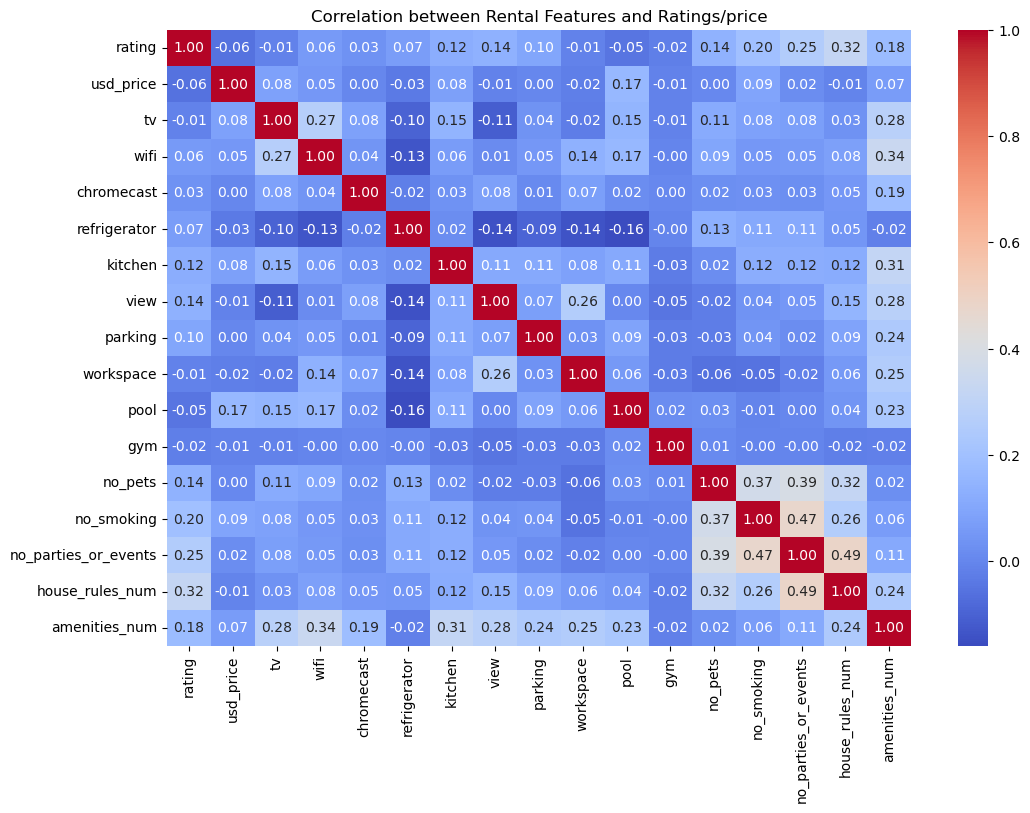

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df[['rating', 'usd_price', 'tv', 'wifi', 'chromecast', 'refrigerator', 'kitchen', 'view', 
           'parking', 'workspace', 'pool', 'gym', 'no_pets', 'no_smoking', 'no_parties_or_events', 
           'house_rules_num', 'amenities_num']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Rental Features and Ratings/price')
plt.show()

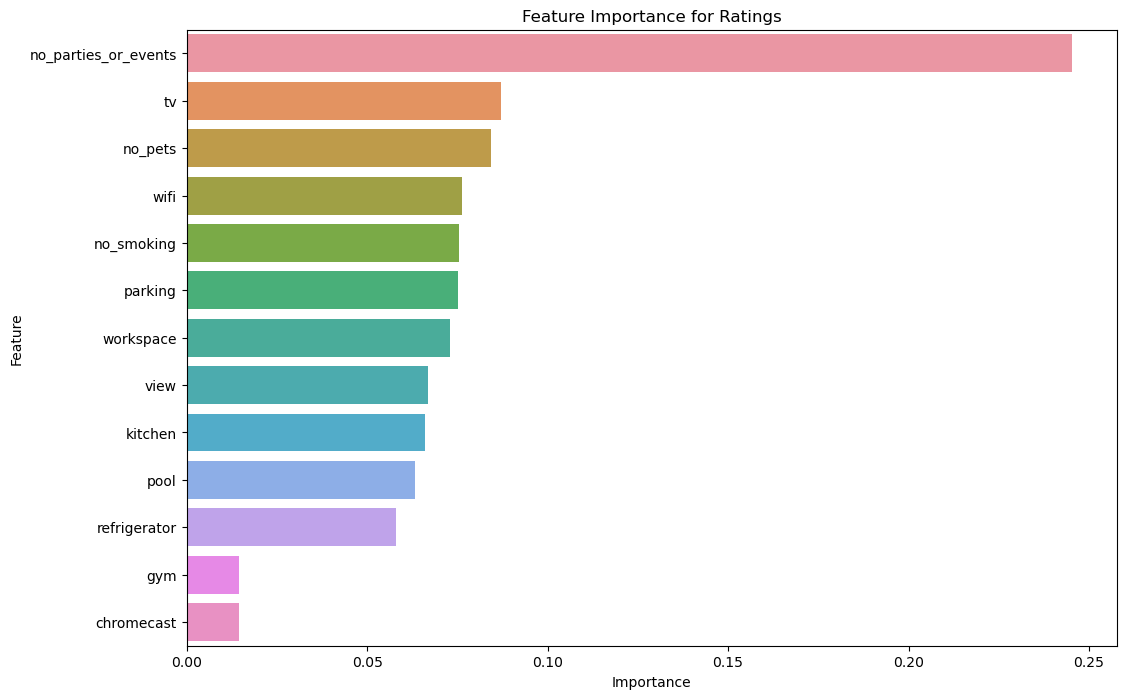

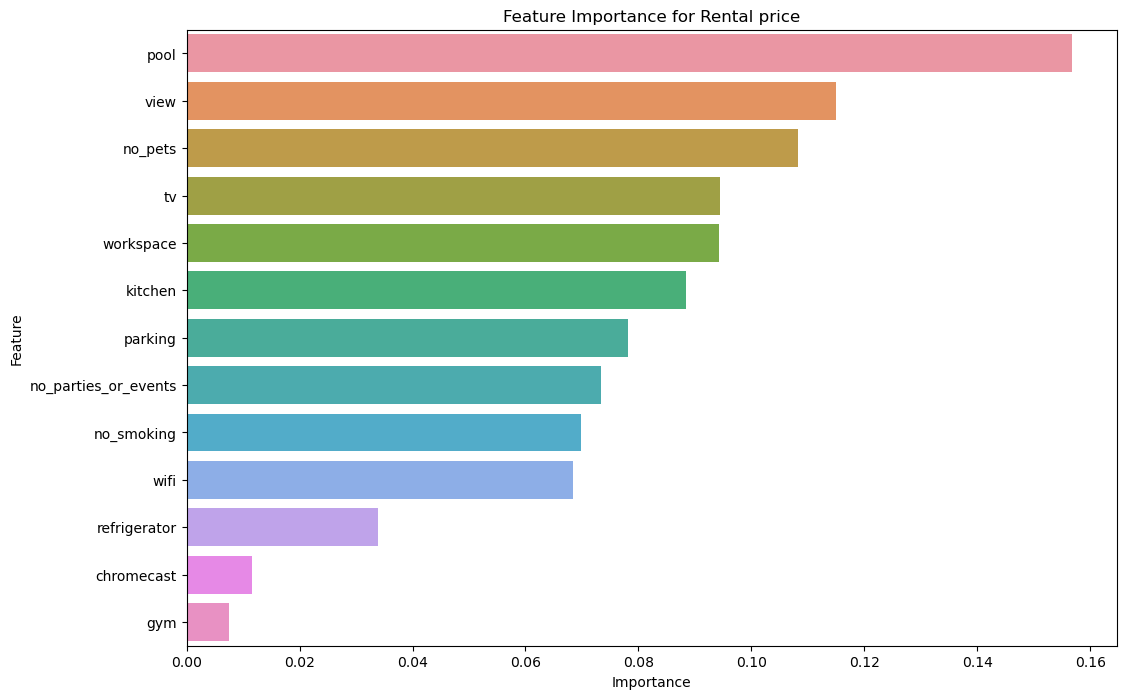

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Prepare feature matrix and target vector
features = ['tv', 'wifi', 'chromecast', 'refrigerator', 'kitchen', 'view', 
            'parking', 'workspace', 'pool', 'gym', 'no_pets', 'no_smoking', 
            'no_parties_or_events']
X = df[features].fillna(0)  # Fill missing values
y_rating = df['rating'].fillna(df['rating'].mean())  # Handle missing ratings
y_price = df['usd_price'].fillna(df['usd_price'].mean())  # Handle missing price

# Fit Random Forest model for ratings
rf_rating = RandomForestRegressor(n_estimators=100)
rf_rating.fit(X, y_rating)

# Fit Random Forest model for price
rf_price = RandomForestRegressor(n_estimators=100)
rf_price.fit(X, y_price)

# Get feature importances
importance_rating = rf_rating.feature_importances_
importance_price = rf_price.feature_importances_

# Create DataFrame for feature importances
importance_df_rating = pd.DataFrame({'Feature': features, 'Importance': importance_rating})
importance_df_price = pd.DataFrame({'Feature': features, 'Importance': importance_price})

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_rating.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance for Ratings')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_price.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance for Rental price')
plt.show()


question: are the listings who charge more get traction?

In [27]:
# Define high-demand properties
high_demand_threshold = df['reviews'].quantile(0.75)
high_demand_properties = df[df['reviews'] >= high_demand_threshold]

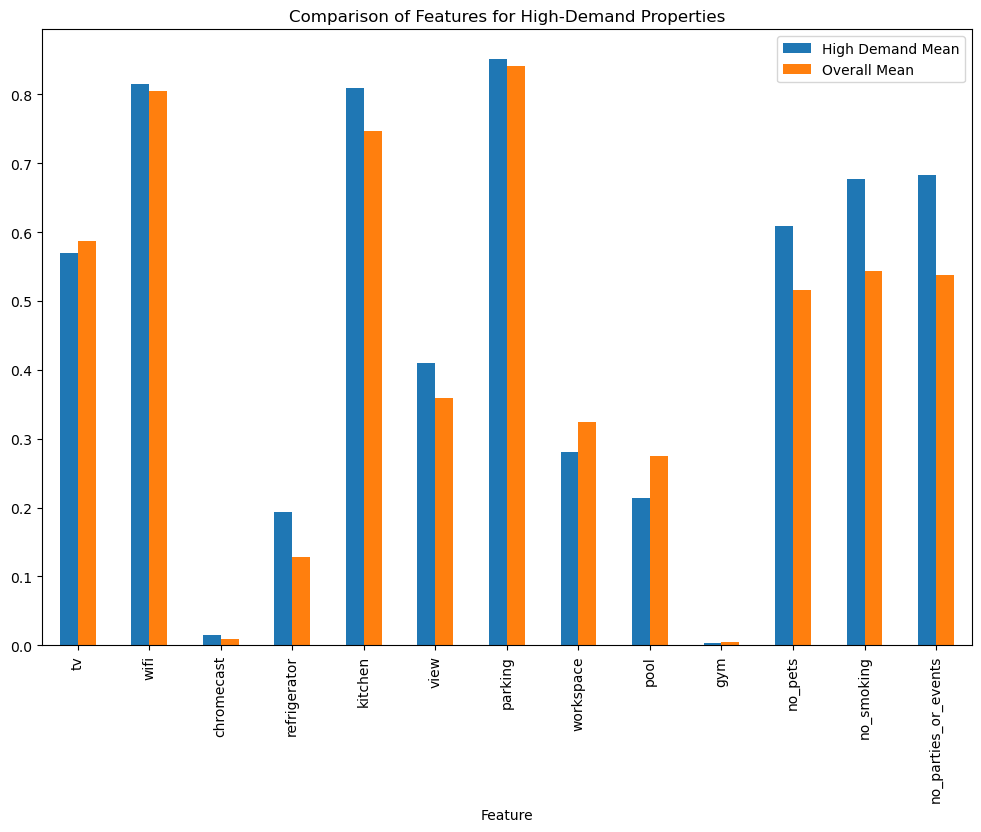

In [28]:
# Compute mean features for high-demand properties
high_demand_features = high_demand_properties[features].mean()

# Compare with overall mean features
overall_features = df[features].mean()

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Feature': features,
    'High Demand Mean': high_demand_features,
    'Overall Mean': overall_features
})

# Plot comparison
comparison_df.plot(x='Feature', kind='bar', figsize=(12, 8))
plt.title('Comparison of Features for High-Demand Properties')
plt.show()


In [29]:
country_summary = df.groupby('country').agg({'rating': 'mean', 'reviews': 'sum'}).reset_index()
country_summary = country_summary.sort_values(by=['rating', 'reviews'], ascending=[False, False])

country_summary


,country,rating,reviews
137,Portugal,5.00,15
116,Belize,5.00,12
45,Ireland,4.95,1084
58,Liechtenstein,4.95,230
73,New Zealand,4.94,1540
...,...,...,...
85,Qatar,-1.00,0
87,Rwanda,-1.00,0
126,Italy,-1.00,0
130,Malaysia,-1.00,0


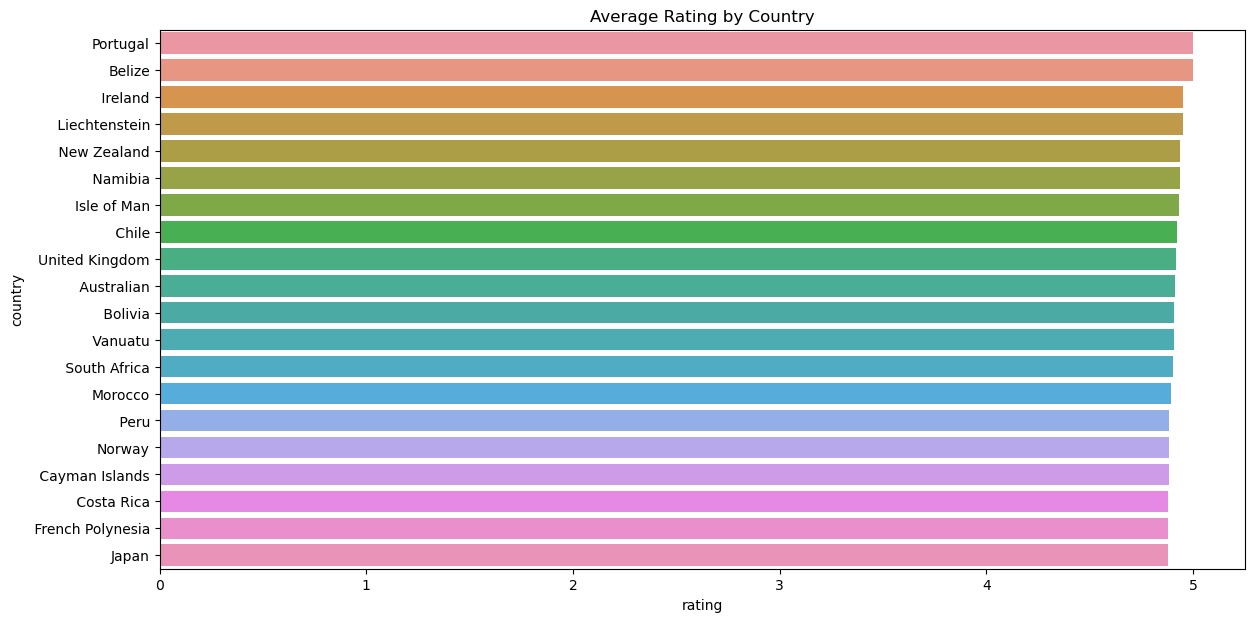

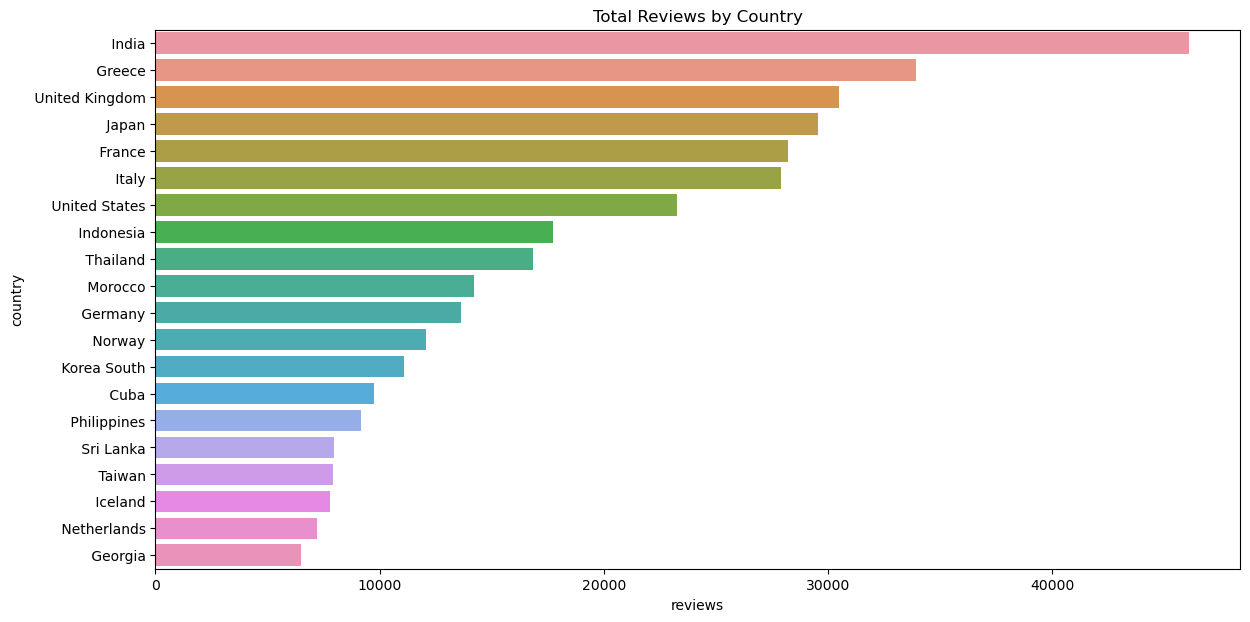

In [30]:
plt.figure(figsize=(14, 7))
sns.barplot(x='rating', y='country', data=country_summary.head(20))
plt.title('Average Rating by Country')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='reviews', y='country', data=country_summary.sort_values(by='reviews',ascending=False).head(20))
plt.title('Total Reviews by Country')
plt.show()

In [31]:
df.loc[df['country'] == ' United States']

,Unnamed: 0,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
308,308,21401089,Borealis Basecamp,4.85,23,103402123,"Fairbanks, Alaska, United States",35479.00,United States,1,1,2,0,1,0,4 00 pm - 1 00 am,12 00 pm,35479.00,False,False,False,False,False,False,True,False,False,False,True,True,False,7,7,7
332,332,52202835,"River Rest 1: Brand new, on river, prime locat...",4.93,44,105112930,"Fairbanks, Alaska, United States",16608.00,United States,1,1,2,0,1,0,After 3 00 pm,11 00 am,16608.00,True,True,False,False,True,True,True,True,False,False,True,True,True,10,6,10
359,359,31314964,Aurora Villa 御墅极光 D2B(1)Deluxe double bed Room,4.86,14,234392519,"Fairbanks, Alaska, United States",53629.00,United States,1,1,4,0,1,0,3 00 pm - 12 00 am,11 00 am,53629.00,True,True,False,False,False,False,True,False,False,False,True,True,True,9,6,7
517,517,52311422,Life’s Better on the River!,4.97,72,56795945,"Fairbanks, Alaska, United States",21522.00,United States,1,3,5,0,2,0,After 3 00 pm,11 00 am,21522.00,True,True,False,False,True,True,True,False,False,False,True,True,False,9,6,11
522,522,13769501,Eskimo Kisses Cabin,4.61,246,80784949,"Fairbanks, Alaska, United States",10658.00,United States,1,3,8,0,1,0,After 4 00 pm,11 00 am,10658.00,True,True,False,False,True,False,True,False,False,False,True,True,True,9,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10849,10849,50048410,Home recording studio minutes from the beach!,-1.00,0,207367268,"Brooklyn, New York, United States",12539.00,United States,1,0,2,0,1,0,After 3 00 pm,Flexible,12539.00,True,True,False,False,True,False,True,True,False,False,True,True,True,8,6,10
10850,10850,49140582,🏳️‍🌈🍁 arthouse 1312 - room 3,4.83,48,34850487,"Tempe, Arizona, United States",5025.00,United States,1,1,1,0,1,0,Flexible,10 00 am,5025.00,True,True,False,False,True,False,True,True,False,False,True,True,True,10,6,10
10854,10854,23687132,Historic upscale artist loft on the Beltline,4.98,52,88334116,"Atlanta, Georgia, United States",20651.00,United States,1,1,3,0,1,0,After 3 00 pm,11 00 am,20651.00,True,True,False,False,True,False,True,True,False,False,True,True,True,9,6,14
10856,10856,12604546,"Spacious, Comfy, Close to Everything!",4.99,133,68399601,"Nashville, Tennessee, United States",48873.00,United States,2,3,8,0,3,0,After 3 00 pm,11 00 am,48873.00,True,True,False,False,True,False,True,True,False,False,True,True,True,10,9,10


In [32]:
def extract_city(address):
    # Split the address by comma
    parts = address.split(',')
    # Check if there are enough parts
    if len(parts) > 1:
        # Return the city part (assuming city is the first part)
        return parts[0].strip()
    return None

# Apply the function to create a new column for the city
df['city'] = df['address'].apply(extract_city)

df

,Unnamed: 0,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num,city
0,0,49849504,Perla bungalov,4.71,64,357334205,"Kartepe, Kocaeli, Turkey",8078.00,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,244.14,True,True,False,False,True,True,True,False,False,False,False,False,False,5,6,10,Kartepe
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,-1.00,0,386223873,"Kaş, Antalya, Turkey",4665.00,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,140.99,True,True,False,False,True,False,True,True,True,False,True,True,True,5,6,10,Kaş
2,2,50699164,cottages sataplia,4.85,68,409690853,"Imereti, Georgia",5991.00,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,2202.57,True,True,False,False,True,True,True,True,False,False,False,False,False,4,6,10,Imereti
3,3,49871422,Sapanca Breathable Bungalow,5.00,13,401873242,"Sapanca, Sakarya, Turkey",11339.00,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,342.70,True,True,False,False,True,True,True,False,True,False,True,True,False,4,6,10,Sapanca
4,4,51245886,Bungalov Ev 2,-1.00,0,414884116,"Sapanca, Sakarya, Turkey",6673.00,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,201.68,True,True,False,False,True,False,True,False,False,False,True,True,True,8,6,8,Sapanca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,12800,44697740,"Brown Dome House No. 3, full of healing",4.94,16,161552316,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...",4288.00,Korea South,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am,3.10,True,True,False,False,True,False,True,False,True,False,False,True,False,4,6,10,Imhoe-myeon
12801,12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,4.67,6,118954227,"Gianyar, Indonesia",15200.00,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm,0.94,False,True,False,False,False,False,True,False,False,False,True,True,True,5,6,8,Gianyar
12802,12802,32977697,Paradise Eco Hub,4.67,3,175214568,"Kabale, Uganda",9103.00,Uganda,1,2,2,0,1,0,After 3 00 pm,Flexible,2.44,False,True,False,False,False,False,False,False,False,False,False,False,False,1,6,5,Kabale
12803,12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,4.86,7,718423,"Gunung Sari, Nusa Tenggara Barat, Indonesia",42262.00,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm,2.61,False,True,False,False,True,False,True,True,True,False,True,False,False,8,6,10,Gunung Sari


In [33]:
# ! pip install geopy geopandas shapely
# from geopy.geocoders import Nominatim
# import geopandas as gpd
# from shapely.geometry import Point

# # Initialize geolocator
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Function to get coordinates from city
# def get_coordinates(city):
#     try:
#         location = geolocator.geocode(city)
#         if location:
#             return (location.latitude, location.longitude)
#     except:
#         return None
#     return None

# # Apply function to get coordinates
# df['coordinates'] = df['city'].apply(get_coordinates)

# # Split coordinates into separate columns
# df[['latitude', 'longitude']] = pd.DataFrame(df['coordinates'].tolist(), index=df.index)


In [34]:
# # Drop rows where coordinates are missing
# df = df.dropna(subset=['latitude', 'longitude'])

# # Create GeoDataFrame
# geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
# gdf = gpd.GeoDataFrame(df, geometry=geometry)

# # Set the coordinate reference system (CRS) to WGS84 (common for GPS coordinates)
# gdf.set_crs(epsg=4326, inplace=True)
